<ipython-input-5-0d204cd9a980>:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])  # convert to datetime
<ipython-input-5-0d204cd9a980>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predicted'] = model.predict(test[['Day']])


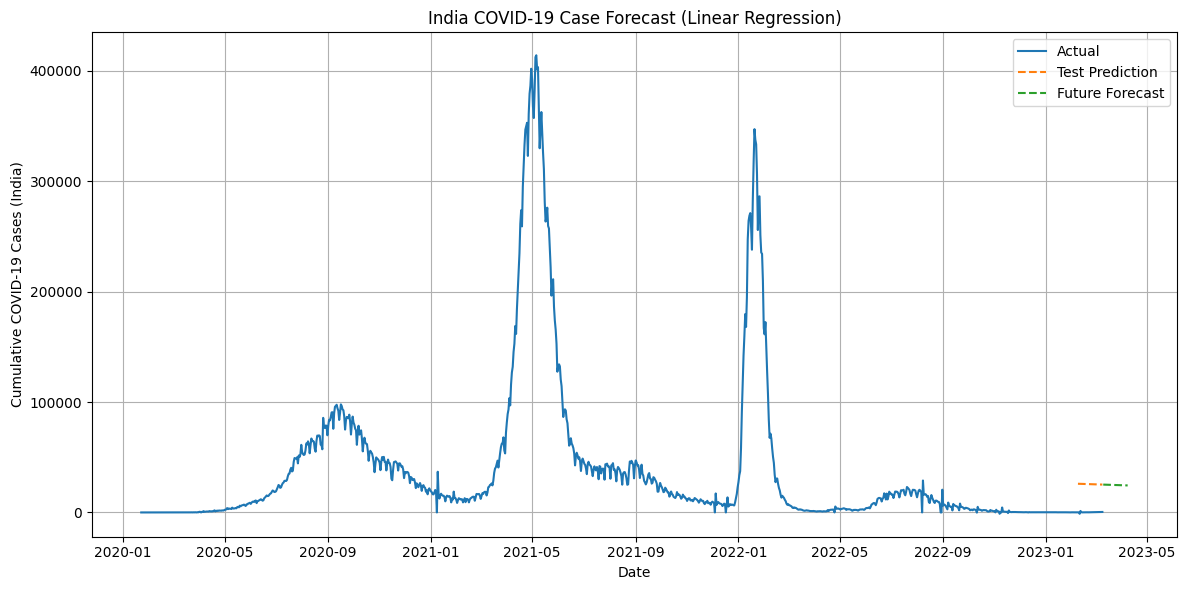

In [5]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os

# STEP 1: Extract ZIP file
zip_file_path = '/content/archive.zip'
extract_to = 'covid_data'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# STEP 2: Load India data from the convenient dataset
file_path = os.path.join(extract_to, 'CONVENIENT_global_confirmed_cases.csv')
df = pd.read_csv(file_path)

# STEP 3: Clean data
df = df.drop(index=0)  # remove header row inside data
df = df.rename(columns={"Country/Region": "Date"})
df['Date'] = pd.to_datetime(df['Date'])  # convert to datetime
india_df = df[['Date', 'India']].copy()
india_df['India'] = india_df['India'].astype(float)

# STEP 4: Feature engineering
india_df['Day'] = (india_df['Date'] - india_df['Date'].min()).dt.days

# STEP 5: Train/test split
train = india_df[:-30]
test = india_df[-30:]

# STEP 6: Linear Regression model
model = LinearRegression()
model.fit(train[['Day']], train['India'])
test['Predicted'] = model.predict(test[['Day']])

# STEP 7: Forecast next 30 days
future_days = 30
last_day = india_df['Day'].max()
future = pd.DataFrame({'Day': range(last_day + 1, last_day + 1 + future_days)})
future['Predicted'] = model.predict(future[['Day']])
future['Date'] = india_df['Date'].max() + pd.to_timedelta(future['Day'] - last_day, unit='D')

# STEP 8: Plot the results
plt.figure(figsize=(12, 6))
plt.plot(india_df['Date'], india_df['India'], label='Actual')
plt.plot(test['Date'], test['Predicted'], label='Test Prediction', linestyle='--')
plt.plot(future['Date'], future['Predicted'], label='Future Forecast', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Cumulative COVID-19 Cases (India)')
plt.title('India COVID-19 Case Forecast (Linear Regression)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
